# 3. Keras Hyperparameter Tuning

In [4]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [3]:
# Importing the dataset
df= pd.read_csv(r'C:\Users\Student\Desktop\4nm21ai065\datasets\Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [6]:
#finding missing values
df=df.dropna()
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [7]:
#Creation of feature set and target set
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
def hyper_tune(param):
    model = keras.Sequential()
    for i in range(param. Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=param.Int('units_' + str(i),
                                              min_value=32,
                                              max_value=512,
                                              step=32),
                              activation='tanh'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(
    param.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mean_absolute_error',
                 metrics=['mean_absolute_error'])
    return model

In [9]:
tuner = RandomSearch(hyper_tune,
                    objective='val_mean_absolute_error',
                    max_trials=5,
                    executions_per_trial=3,
                    directory='project',
                    overwrite=True,
                    project_name='Air Quality Index')

In [10]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [13]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=0)

In [14]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 03s]
val_mean_absolute_error: 65.31983184814453

Best val_mean_absolute_error So Far: 64.74708302815755
Total elapsed time: 00h 00m 33s
INFO:tensorflow:Oracle triggered exit


Epoch 1/5
24/24 [==============================] - 1s 9ms/step - loss: 89.8350 - mean_absolute_error: 89.8350 - val_loss: 71.9280 - val_mean_absolute_error: 71.9280
Epoch 2/5
24/24 [==============================] - 0s 6ms/step - loss: 72.9214 - mean_absolute_error: 72.9214 - val_loss: 65.6523 - val_mean_absolute_error: 65.6523
Epoch 3/5
24/24 [==============================] - 0s 4ms/step - loss: 67.9204 - mean_absolute_error: 67.9204 - val_loss: 64.7434 - val_mean_absolute_error: 64.7434
Epoch 4/5
24/24 [==============================] - 0s 4ms/step - loss: 66.4899 - mean_absolute_error: 66.4899 - val_loss: 65.0390 - val_mean_absolute_error: 65.0390
Epoch 5/5
24/24 [==============================] - 0s 5ms/step - loss: 66.2868 - mean_absolute_error: 66.2868 - val_loss: 65.3738 - val_mean_absolute_error: 65.3738


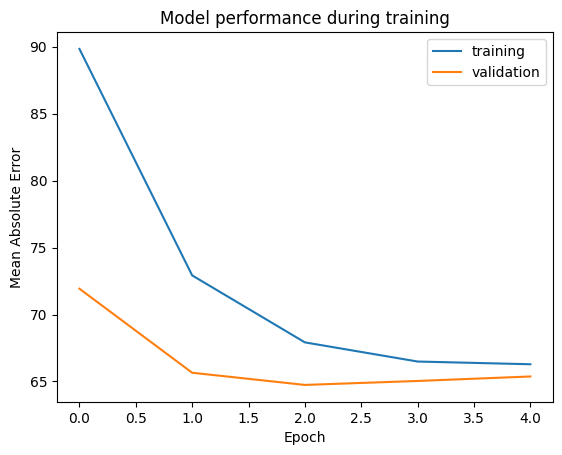

In [17]:
import matplotlib.pyplot as plt

# Get the best hyperparameters found during the search
best_hps = tuner.get_best_hyperparameters(1)[0]

# Build the model with the best hyperparameters
model = hyper_tune(best_hps)

# Train the model witht the best hyperparameters on the full training det
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot the training and validation metrics for each epoch
plt.plot(history.history['mean_absolute_error'], label='training')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.title('Model performance during training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [ ]:
0